## Logistic Regresison with Gradient Descent and Sochastic Gradient Descent 

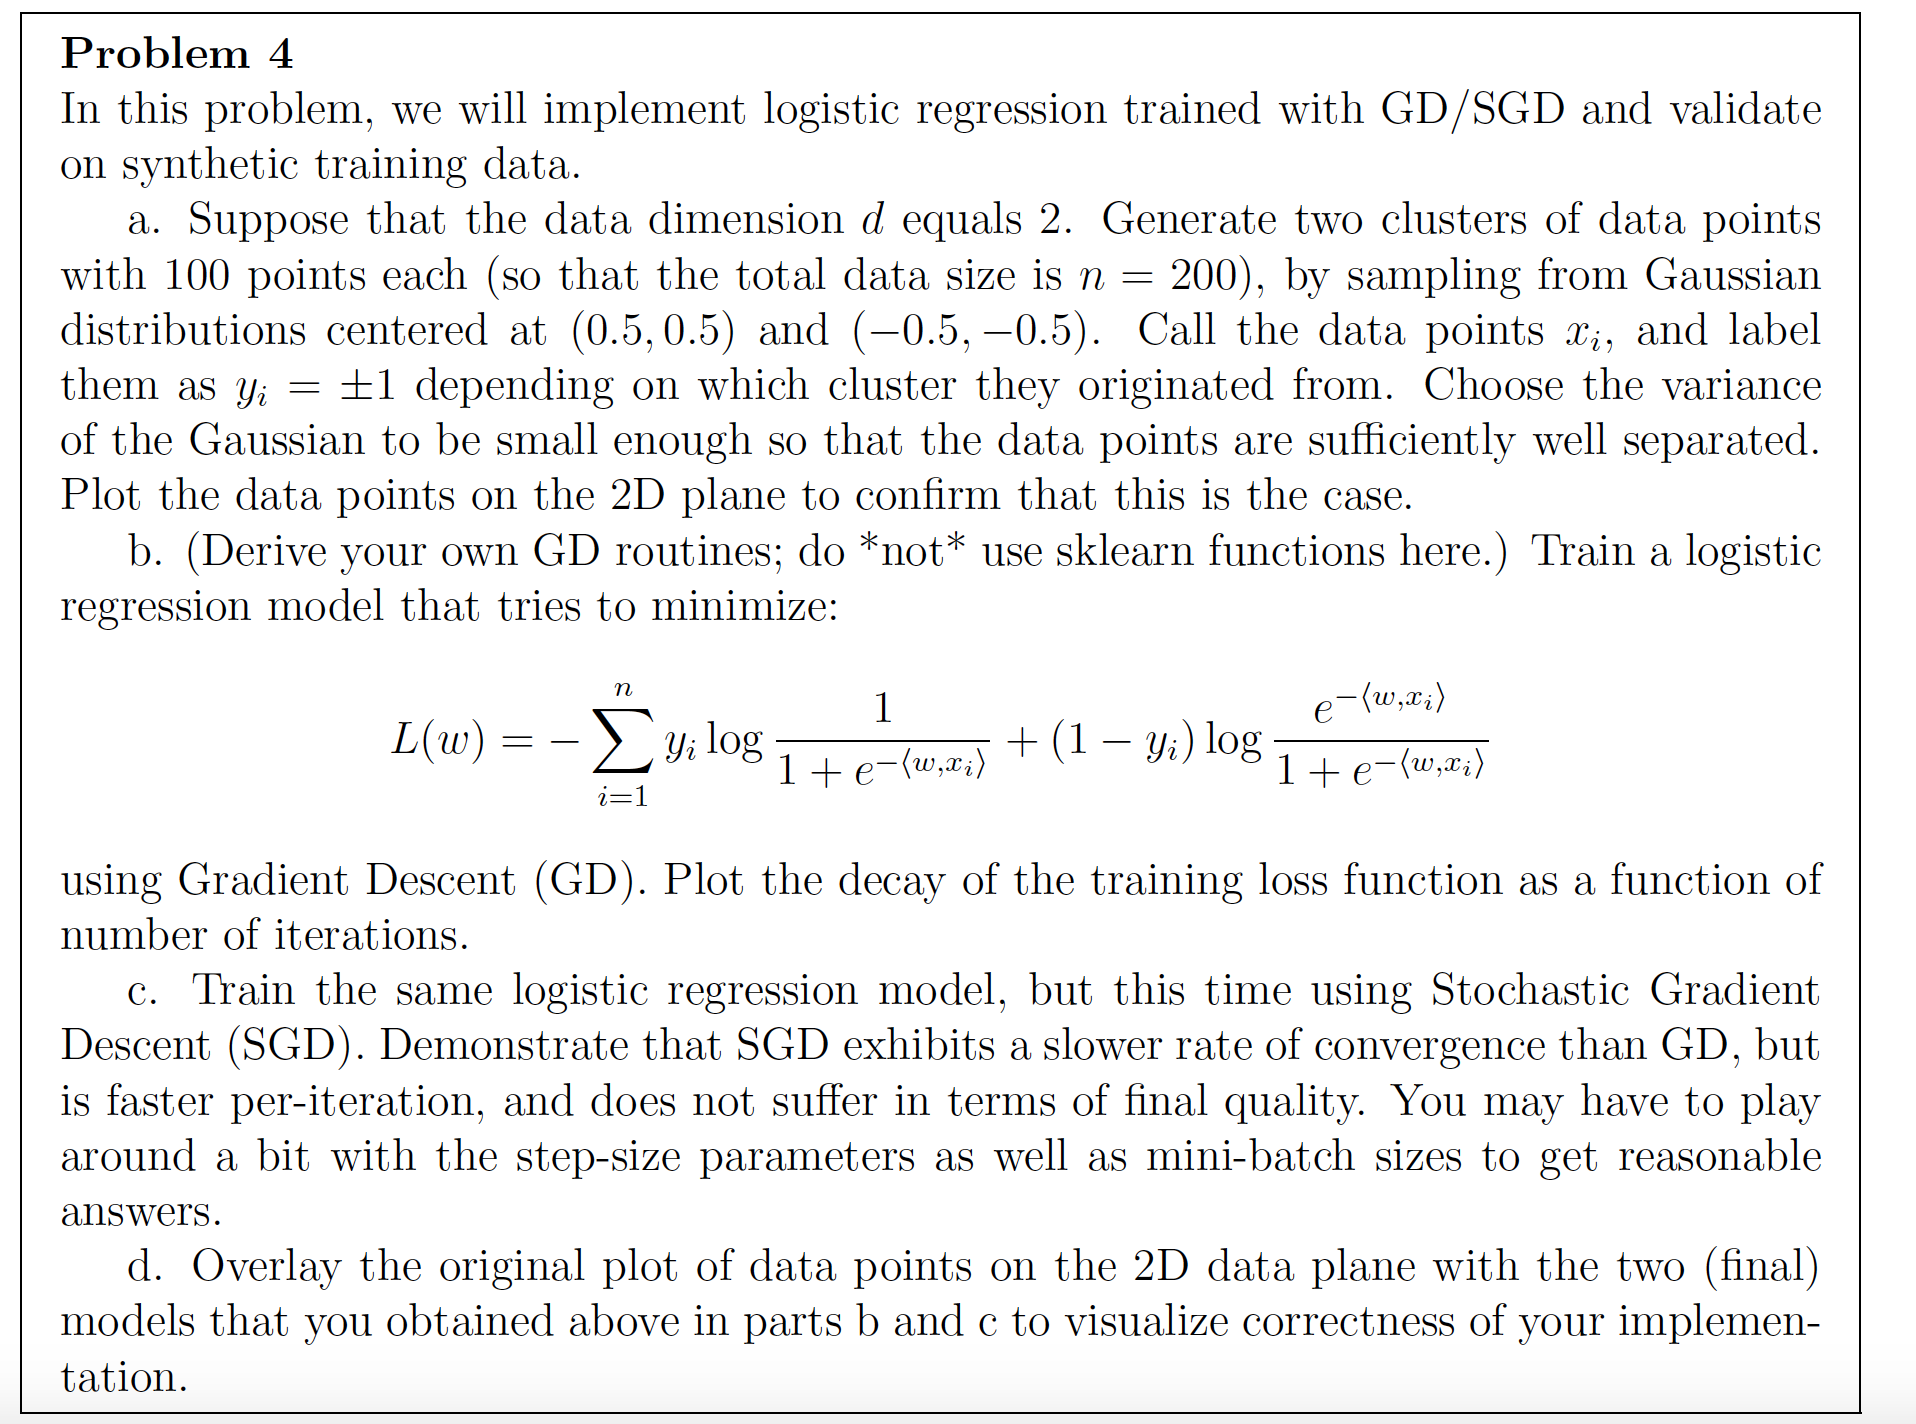

### Generating the Input Data 

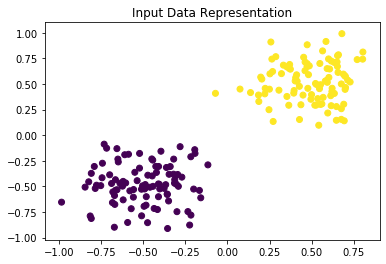

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random

d = 2
cov = 0.03*np.eye(d)

means1 = np.array([0.5,0.5])
X1 = np.random.multivariate_normal(means1,cov,100)
Y1 = np.ones(len(X1))

means2 = np.array([-0.5,-0.5])
X2 = np.random.multivariate_normal(means2,cov,100)
Y2 = np.zeros(len(X1))

X = np.concatenate([X1, X2])
Y = np.concatenate([Y1, Y2]) 

plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('Input Data Representation')
plt.show()

X = np.concatenate([np.ones((X.shape[0],1)), X],axis=1)


In [2]:
alpha = 0.1
N = X.shape[0]
MAX_EPOCH = 10000
w_init = np.random.rand(3)


### The Hypothesis function and the Loss function

In [3]:
def fxFunction(X,w):
    f =  1 / ( 1 + np.exp(-(np.dot(X,w))));
    return f 

def loss(f, y):
    # return np.sum((-y * np.log(f) - (1 - y) * np.log(1 - f)))
    return np.dot(-y,np.log(f)) - np.dot((1 - y), np.log(1 - f))
    

### Gradient Decent function

In [4]:
# gradient descent
# intialization
W = w_init
gd_loss = []

for i in range(MAX_EPOCH):
    f = fxFunction(X,W)
    grad = -X.T@(Y - f)
    # break condition
    if np.linalg.norm(grad) < 1e-6:
        break
    else:
        #update condition
        W = W + alpha*(-grad)
        f = fxFunction(X,W)
        cost = loss(f,Y)
        gd_loss.append(cost)
W_gd = W


### Sochastic Gradient Descent Function

In [5]:
# intialization
W = w_init
batch_size = 20
sgd_loss = []

#
# We iterate int(MAX_EPOCH/int(X.shape[0]/batch_size)) times so that
# GD and SGD both see exactly same number of weight updates
#

for i in range(int(MAX_EPOCH/int(X.shape[0]/batch_size))):
    # shuffle dataset at each epoch
    idx = np.arange(X.shape[0])
    random.shuffle(idx)
    X, Y = X[idx,:], Y[idx]
    # selecting batches
    for j in range(0,int(X.shape[0]/batch_size)):
        X_batch, Y_batch = X[batch_size*j:min(N, batch_size*j + batch_size), :],Y[batch_size*j:min(N, batch_size*j + batch_size)]
        f = fxFunction(X_batch,W)
        grad = -X_batch.T@(Y_batch - f)
        # break condition
        if np.linalg.norm(grad) < 1e-6:
            break
        else:
            #update condition
            W = W + alpha*(-grad)

            # we compute overall loss to compare with GD
            f = fxFunction(X,W)
            cost = loss(f,Y)
            sgd_loss.append(cost)
W_sgd = W

### Plot for GD and SGD

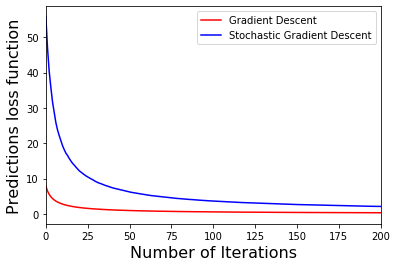

In [6]:
plt.figure()
plt.plot(gd_loss,'r')
plt.plot(sgd_loss,'b')
plt.xlim([0,200])
plt.xlabel('Number of Iterations', fontsize=16)
plt.ylabel('Predictions loss function', fontsize=16) 
plt.legend(["Gradient Descent","Stochastic Gradient Descent"])
plt.show()

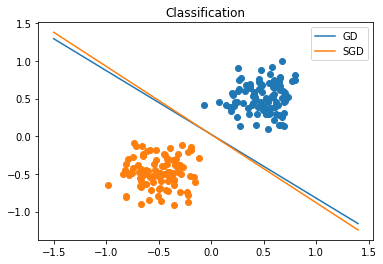

In [7]:

x = np.arange(-1.5,1.5,0.1)
line_GD = -(W_gd[0] + W_gd[1]*x)/W_gd[2]
line_SGD = -(W_sgd[0] + W_sgd[1]*x)/W_sgd[2]

plt.plot(x,line_GD)
plt.plot(x,line_SGD)
plt.legend(('GD','SGD'))
plt.scatter(X1[:, 0], X1[:, 1]);
plt.scatter(X2[:, 0], X2[:, 1]);
plt.title('Classification')
plt.show()
